# Free Code Camp Neural Networks lesson

This notebook is composed of the lessons from freecodecamp.org's "Machine Learning with Python" course. This will cover the "neural networks with TensorFlow" material, expanding on what the instructor provides with explanations of each portion. This is not a comprehensive review of all of TensorFlow's capabilities, but a high level overview to demonstrate comprehension of the material.

# Densely Connected Neural Networks

A **densely connected neural network** is one in which nodes are connected to every node in the previous layer by "weights". These weights are trainable parameters that are adjusted as the model attempts to optimize itself.

**Biases** are a constant value that connect to nodes in the following layer and are trainable parameters that are involved in optimizing the model. Expressed simply, a bias is like a y-intercept in that they shift the value up or down depending on the bias.

___

**Activation functions** take an output from a model and transform it to fit a certain form. They add complexity to a model that allows it to detect more nuanced patterns. 

A **ReLU** (Rectified Linear Unit) function takes negative y-values and converts them to zero. 

A **TanH** (Hyperbolic Tangent) function squishes y-values between -1 and 1. 

A **Sigmoid** function squishes values between 0 and 1.

**Loss functions** represent the quality of a network by its accuracy. A higher value indicates a poor network while a lower value indicated suggests a higher-quality network. Loss functions include **mean squared error**, **mean absolute error**, and **hinge loss**. 

A **gradient descent** takes the result of a loss function and calculates a **gradient** to look for the global minimum to minimize loss from the network. 

An **optimizer function** is utilized in conjuncture with gradient descent to perform backpropogation to minimize loss

# Imports

In [1]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# helper functions
import numpy as np
import matplotlib.pyplot as plt

# Dataset

This tutorial uses the MNIST Fashion Dataset from the keras library. There are 60,000 training images and 10,000 testing images.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training sets

# Basic Data Exploration

In [3]:
train_images.shape # this will show the dimensions of the data 

(60000, 28, 28)

In [4]:
print(train_images.min(), train_images.max()) # this will show the range of values

0 255


In [5]:
train_images[0,23,23] #this will give the value of a single pixel between 0 and 255. 

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# the labels are values 0-9 with each value in that range representing a class of clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting one instance of the data

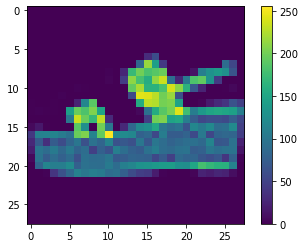

In [8]:
plt.figure()
plt.imshow(train_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

Noted previously, the values in the data range from 0 to 255. To scale the data to fall between 0 and 1 so that processing is faster and the network is less strained, each datapoint needs to be divided by the max value (255). 

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1) 
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output later (3)
])

* Input layer (1) flattens the (28, 28) shaped data (the shape discovered earlier) into a one dimensional array
* Hidden layer (2) features 128 neurons and uses the ReLU activation function
* Output layer (3) features 10 neurons (based on the number of classes) and uses the softmax activation function to ensure that the sum of all 10 neurons is 1 and each neuron has a value between 0 and 1.

# Compile the Model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

In [12]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 660us/step - loss: 0.6333 - accuracy: 0.7777
Epoch 2/8
1875/1875 [==============================] - 1s 655us/step - loss: 0.3809 - accuracy: 0.8632
Epoch 3/8
1875/1875 [==============================] - 1s 649us/step - loss: 0.3428 - accuracy: 0.8754
Epoch 4/8
1875/1875 [==============================] - 1s 726us/step - loss: 0.3122 - accuracy: 0.8863
Epoch 5/8
1875/1875 [==============================] - 1s 675us/step - loss: 0.2934 - accuracy: 0.8929
Epoch 6/8
1875/1875 [==============================] - 1s 675us/step - loss: 0.2805 - accuracy: 0.8977
Epoch 7/8
1875/1875 [==============================] - 1s 676us/step - loss: 0.2639 - accuracy: 0.9042
Epoch 8/8
1875/1875 [==============================] - 1s 681us/step - loss: 0.2561 - accuracy: 0.9055


This function call fits the model to the training data by connecting images with labels. Epochs is a hyper parameter that dictates the number of times the model runs through the training data. Each successive epoch attemps to lower loss and increase accuracy. 

# Evaluating the Model

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 568us/step - loss: 0.3411 - accuracy: 0.8804
Test accuracy: 0.8804000020027161


Model.evaluate utilizes the model as fit on the training data to evaluate the accuracy and loss when the model is applied to testing data it has not yet seen. Verbose is simply a parameter that prints the progress bar or not. The difference in accuracy from training to testing data is known as overfitting. Overfitting occurs as the network gets "used" to seeing the same data repeatedly

# Making Predictions

In [14]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[9])])

Sneaker


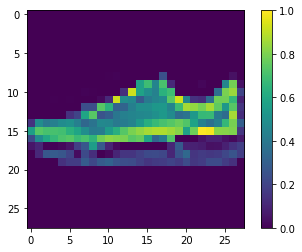

In [15]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

With model.predict, the test data can be ran through the model and given an array of values corresponding to each output category. The category with the highest value is the category that the model believes it belongs to.

In [16]:
def predict(model, image, correct_label):
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, label=class_names[correct_label], guess=predicted_class)

In [17]:
def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label, fontsize=10)
    plt.xlabel("Guess: " + guess, fontsize=10)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [38]:
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

# A correct guess

Pick a number: 1


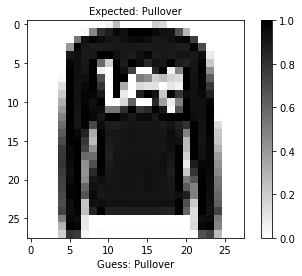

In [40]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

# An incorrect guess

Pick a number: 17


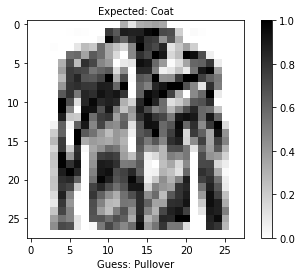

In [39]:
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

Mentioned previously, the network is approximately 88% accurate when assessing test images. Errors in classification appear to occur with articles of clothing where shape is roughly similar or shading obfuscates features that may indicate what class of clothing the test image is. 